## Визуализация торгов за день
- по реальным записям из базы
- тестовые торговые алгоритмы

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

TOKEN = os.getenv("INVEST_TOKEN")

TICKER = 'RNFT'
FIGI = 'BBG00F9XX7H4'

День: 2024-03-20, v2_t60, Итог: -0.92, Записей: 8


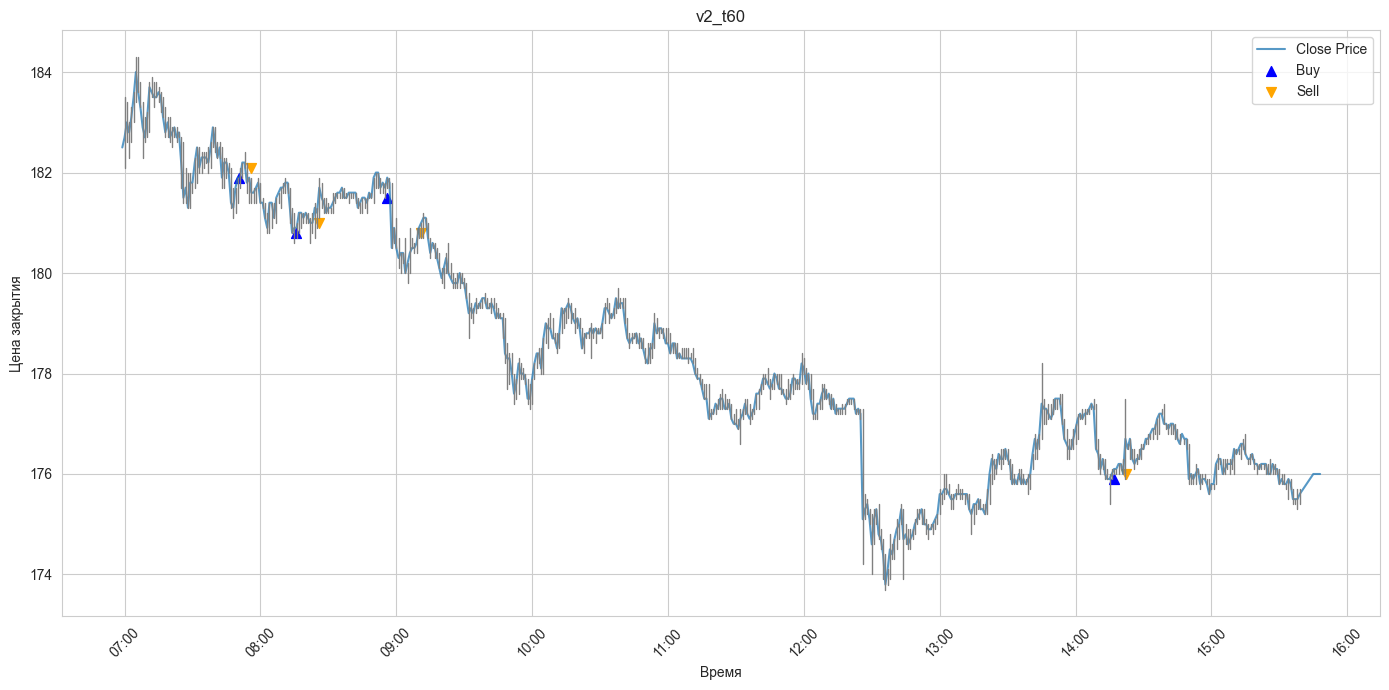

День: 2024-03-20, v5_t10, Итог: -5.91, Записей: 32


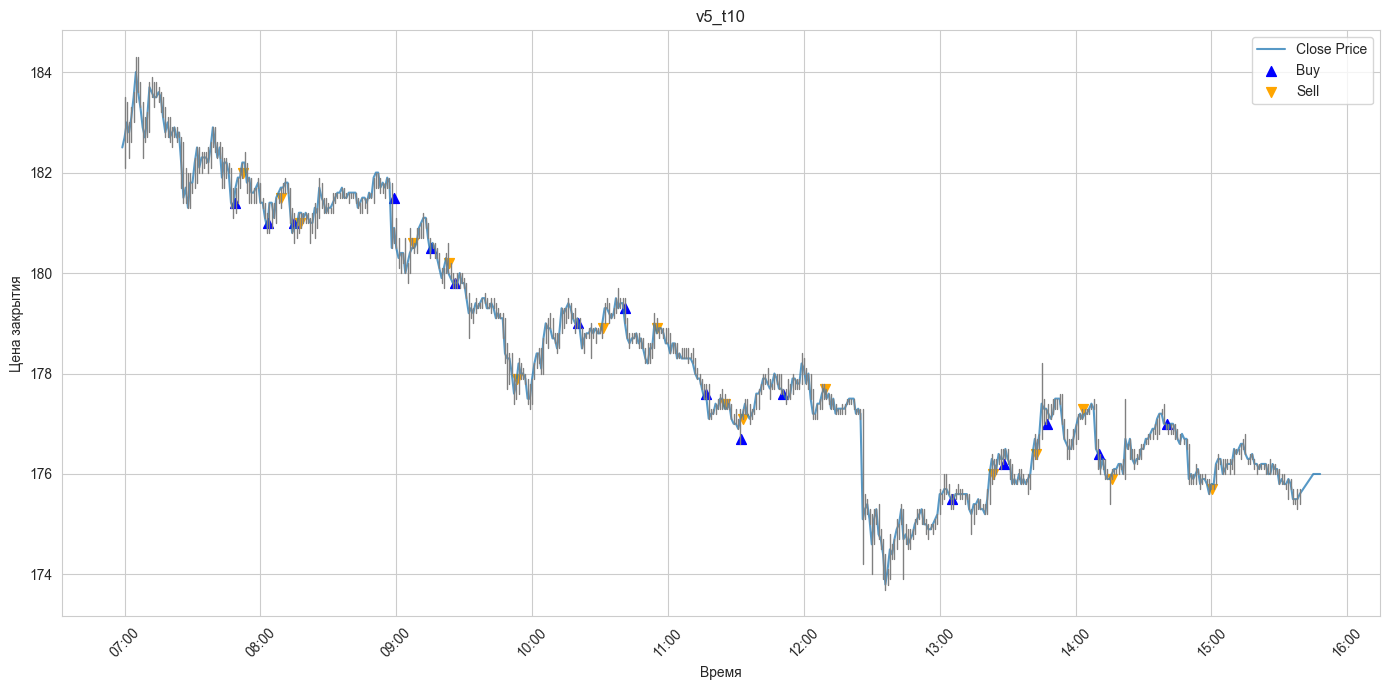

День: 2024-03-20, v5_t300, Итог: -4.3, Записей: 30


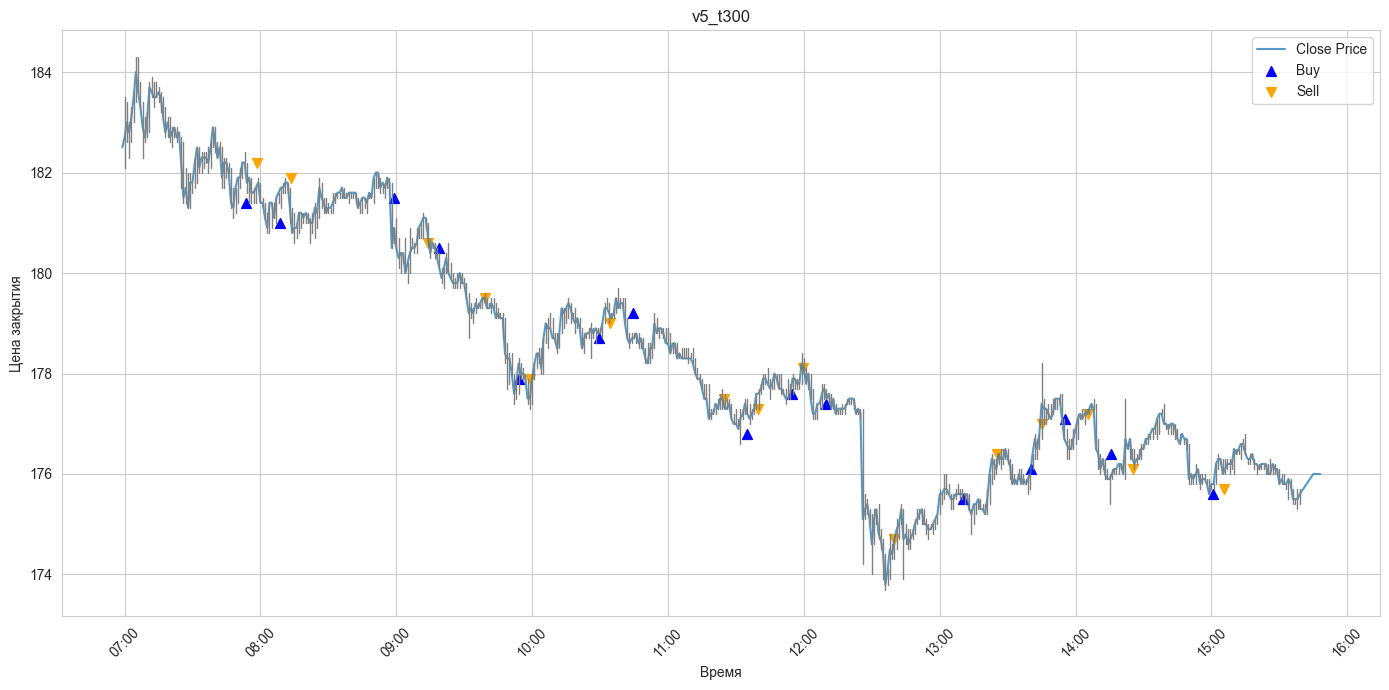

День: 2024-03-20, v5_t60, Итог: -6.82, Записей: 28


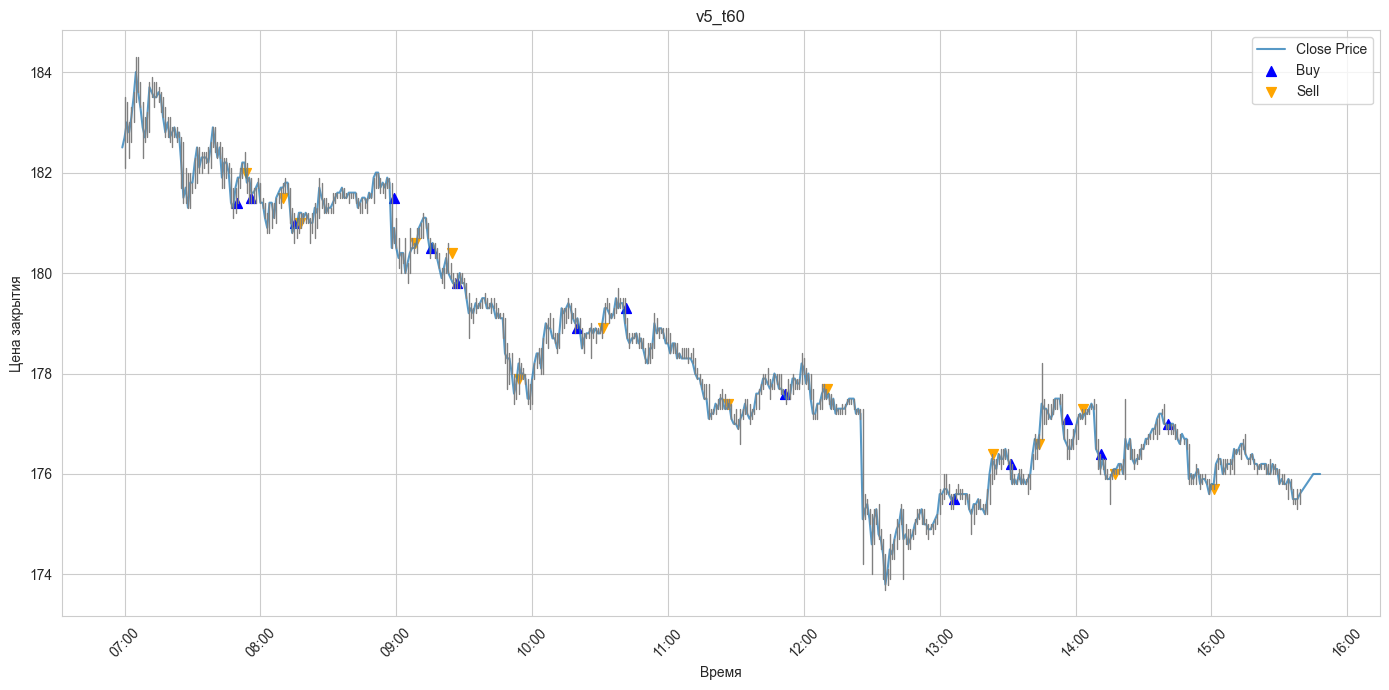

In [19]:
from lib.visaualize import Visualize
from lib.historical_candles import HistoricalCandles
from lib.historical_trade import HistoricalTrade

historical_trade = HistoricalTrade()
data_handler = HistoricalCandles(TOKEN, FIGI, TICKER)

date = '2024-03-20'

results = historical_trade.get_daily_totals(date)
viz = Visualize(data_handler)

for obj in results:
    print(f"День: {obj.date}, {obj.alg_name}, "
          f"{'Итог' if obj.is_closed else 'Подытог'}: {obj.total}, "
          f"Записей: {obj.cnt}")
    viz.draw(
        obj.date, 
        historical_trade.get_deals(obj.date, obj.alg_name), 
        obj.alg_name
    )